# Data exploration and descriptive statistics

- This notebook decribes the basic statistics of customers information and their response on the vertical search website.

- The dataset is provided by Root Inc. and no more data cleaning is required.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("whitegrid")

## Dataset description 

In [3]:
# Read the csv file
df = pd.read_csv('Root Insurance/Root_Insurance_data.csv')
print(df.shape)
df.head()

(10000, 8)


,Currently Insured,Number of Vehicles,Number of Drivers,Marital Status,bid,rank,click,policies_sold
0,unknown,2,1,M,10.0,2,False,0
1,Y,3,1,M,10.0,5,False,0
2,Y,3,2,M,10.0,5,False,0
3,N,3,2,S,10.0,4,False,0
4,unknown,2,2,S,10.0,2,False,0


In [4]:
df[['Currently Insured', 'Number of Vehicles', 'Number of Drivers', 'Marital Status']].value_counts()

Currently Insured  Number of Vehicles  Number of Drivers  Marital Status
N                  3                   2                  M                 326
Y                  2                   2                  M                 317
N                  2                   2                  S                 316
unknown            2                   2                  M                 306
Y                  2                   2                  S                 304
unknown            1                   2                  S                 303
N                  1                   1                  M                 300
                   2                   2                  M                 296
Y                  1                   2                  M                 295
unknown            1                   2                  M                 294
                                       1                  M                 294
Y                  3                   1       

In [5]:
# All the possible values in each column
print('"Currently Insured" column has value:', df['Currently Insured'].unique())
print('"Number of Vehicles" column has value:', df['Number of Vehicles'].unique())
print('"Number of Drivers" column has value:', df['Number of Drivers'].unique())
print('"Marital Status" column has value:', df['Marital Status'].unique())
print('"bid" column has value:', df['bid'].unique())
print('"rank" column has value:', df['rank'].unique())
print('"click" column has value:', df['click'].unique())
print('"policies_sold" column has value:', df['policies_sold'].unique())

"Currently Insured" column has value: ['unknown' 'Y' 'N']
"Number of Vehicles" column has value: [2 3 1]
"Number of Drivers" column has value: [1 2]
"Marital Status" column has value: ['M' 'S']
"bid" column has value: [10.]
"rank" column has value: [2 5 4 1 3]
"click" column has value: [False  True]
"policies_sold" column has value: [0 1]


- In this dataset, in total 10,000 customers are categorized by four features: "Currently Insured", "Number of Vehicles", "Number of Drivers" and "Marital Status". The possible values for each feature is summarized above. There are in total 35 types of customers (Presumably there would be 36 types of customers, but no customer is recorded with unknown insurance status, 3 vehicles, 2 drivers and single).

- The bid for all customer is a constant of 10 dollars. The bid is the variable we tune in optimization.

- The ads position on the vertical search websites can have five rankings, with 1 being shown in the highest position and 5 the lowest. 

- Customers can either click on the ads or not (True or False in the "click" column). If they click, they can either buy the policy or not (1 or 0 in the "policies_sold" column) 

In [17]:
num_cust = np.array(df['rank'].value_counts().sort_index())
num_cust_str = '      '.join(str(i) for i in num_cust)

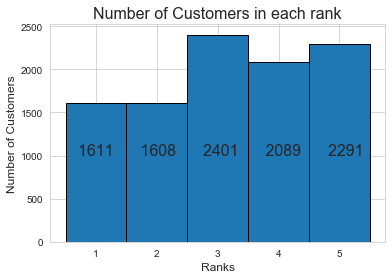

In [30]:
plt.hist(df['rank'], bins=[1, 2, 3, 4, 5, 6], edgecolor="black", align='left')
plt.text(0.7, 1000, num_cust_str, size=16)
plt.xlabel('Ranks', size=12)
plt.ylabel('Number of Customers',size=12)
plt.title('Number of Customers in each rank', size=16);


## Click in each rank

In [63]:
print('Total number of not click(False) and click(True):\n', df['click'].value_counts())

Total number of not click(False) and click(True):
 False    8122
True     1878
Name: click, dtype: int64


- The click data is unbalanced. Customers that didn't click is 4 times more than those click. 

In [19]:
pd.DataFrame(df.groupby(['rank'])['click'].value_counts()).T

rank      1           2           3           4           5      
click True  False False True  False True  False True  False True 
click   848   763  1146   462  2050   351  1921   168  2242    49

In [38]:
# Create a new dataframe to store the number of click in each rank
click = pd.DataFrame([{'Click':868, 'Not click':763},
                    {'Click':462, 'Not click':1146},
                    {'Click':351, 'Not click':2050},
                    {'Click':168, 'Not click':1921},
                    {'Click':49, 'Not click':2242}])
click['percentage'] = click['Click']/(click['Click']+click['Not click'])*100
click.index+=1
percent = '   '.join(str(i.round(2))+'%' for i in np.array(click['percentage'])) # this is the annotation in the plot below

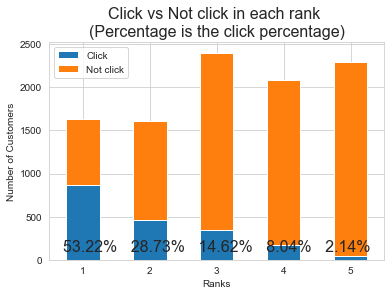

In [52]:
# Plot click vs not click in each rank 
axis = click[["Click", "Not click"]].plot(kind="bar", stacked=True)

fig = axis.get_figure()
plt.text(-0.3, 100, percent, size=16)
axis.set_xticklabels(axis.get_xticks()+1, rotation = 0)
plt.xlabel('Ranks')
plt.ylabel('Number of Customers')
plt.title('Click vs Not click in each rank \n(Percentage is the click percentage)', size=16);

 - Within expectation, higher the rank of the ads, more likely it will be clicked.

## Policies sold in each rank

In [66]:
print('Total number of policies not sold(0) and sold(1):\n', df['policies_sold'].value_counts())

Total number of policies not sold(0) and sold(1):
 0    9217
1     783
Name: policies_sold, dtype: int64


In [65]:
print('Total number of policies not sold(0) and sold(1) if the ads is click:\n', df[df['click']==True]['policies_sold'].value_counts())

Total number of policies not sold(0) and sold(1) if the ads is click:
 0    1095
1     783
Name: policies_sold, dtype: int64


- The policies sold data is balanced, provided that the ads is clicked.

In [41]:
pd.DataFrame(df[df['click']==True].groupby(by=['rank'])['policies_sold'].value_counts()).T

rank             1         2         3         4       5    
policies_sold    0    1    0    1    0    1    0   1   0   1
policies_sold  490  358  253  209  213  138  110  58  29  20

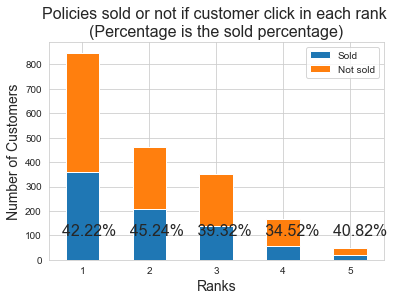

In [48]:
# Create a new data frame to store policy sold in each rank 
buy = pd.DataFrame([{'Sold':358, 'Not sold':490},
                    {'Sold':209, 'Not sold':253},
                    {'Sold':138, 'Not sold':213},
                    {'Sold':58, 'Not sold':110},
                    {'Sold':20, 'Not sold':29}])

buy['percentage'] = buy['Sold']/(buy['Sold'] + buy['Not sold'])*100
buy.index+=1
percent_buy = '   '.join(str(i.round(2))+'%' for i in np.array(buy['percentage'])) # this is the annotation in the plot below

axis = buy[["Sold", "Not sold"]].plot(kind="bar", stacked=True)

fig = axis.get_figure()
axis.set_xticklabels(axis.get_xticks()+1, rotation = 0)
plt.xlabel('Ranks', size=14)
plt.ylabel('Number of Customers',size=14)
plt.title('Policies sold or not if customers click in each rank \n(Percentage is the sold percentage)', size=16)
plt.text(-0.3, 100, percent_buy, size=16);

## How customer features affect rank

### Number of vehicles

In [70]:
pd.DataFrame(df.groupby(['rank'])['Number of Vehicles'].value_counts()).T

rank                  1              2              3              4       \
Number of Vehicles    1    2    3    1    2    3    1    2    3    3    2   
Number of Vehicles  898  561  152  910  463  235  927  744  730  863  695   

rank                        5             
Number of Vehicles    1     3     2    1  
Number of Vehicles  531  1115  1001  175

In [71]:
# Create a dataframe to store number of vehicles in each rank
num_vehicles = pd.DataFrame([{'1':898, '2':561, '3':152},
                    {'1':910, '2':463, '3':235},
                    {'1':927, '2':744, '3':730},
                    {'1':531, '2':695, '3':863},
                    {'1':175, '2':1001, '3':1115}])
num_vehicles.index +=1

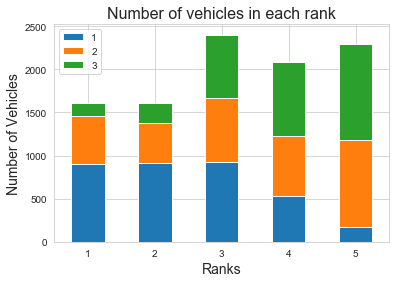

In [73]:
axis = num_vehicles.plot(kind="bar", stacked=True)

fig = axis.get_figure()

plt.xlabel('Ranks',size=14)
plt.ylabel('Number of Vehicles', size=14)
plt.title('Number of vehicles in each rank', size=16)
axis.set_xticklabels(axis.get_xticks()+1, rotation = 0);

- More vehicles a customer owns, more money will be bid by other companies and our ads will have a low rank. 

### Marrital status

In [54]:
df['Married'] = 0
df.loc[df['Marital Status']=='M', 'Married'] = 1

In [74]:
pd.DataFrame(df.groupby(by=['rank'])['Married'].value_counts()).T


rank       1         2          3           4           5      
Married    0    1    1    0     1     0     1     0     1     0
Married  806  805  827  781  1269  1132  1086  1003  1204  1087

In [57]:
# Create a dataframe to store marrital status in each rank
marriage = pd.DataFrame([{'Married':806, 'Not Married':805},
                    {'Married':827, 'Not Married':781},
                    {'Married':1269, 'Not Married':1132},
                    {'Married':1086, 'Not Married':1003},
                    {'Married':1204, 'Not Married':1087}])
percentage = marriage['Married']/(marriage['Married']+marriage['Not Married'])*100
marriage.index += 1

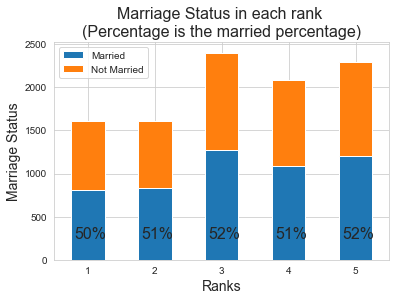

In [75]:
axis = marriage.plot(kind="bar", stacked=True)

fig = axis.get_figure()
for i in range(len(percentage)):
    axis.text(i-0.2, 250, str(int(percentage[i]))+'%', fontsize=16)
plt.xlabel('Ranks', size=14)
plt.ylabel('Marriage Status', size=14)
plt.title('Marriage Status in each rank \n(Percentage is the married percentage)', size=16)
axis.set_xticklabels(axis.get_xticks()+1, rotation = 0);

- Marrital status doesn't seem to affect other companies' bidding.

### Number of drivers

In [82]:
pd.DataFrame(df.groupby(by=['rank'])['Number of Drivers'].value_counts()).T

rank                 1         2          3           4          5      
Number of Drivers    2    1    2    1     2     1     1    2     1     2
Number of Drivers  886  725  868  740  1228  1173  1090  999  1273  1018

In [83]:
# Create a dataframe to store number of drivers in each rank
num_drivers = pd.DataFrame([{'1':725, '2':886},
                    {'1':740, '2':868},
                    {'1':1173, '2':1228},
                    {'1':1090, '2':999},
                    {'1':1273, '2':1018}])
percentage = num_drivers['1']/(num_drivers['1']+num_drivers['2'])*100
num_drivers.index += 1

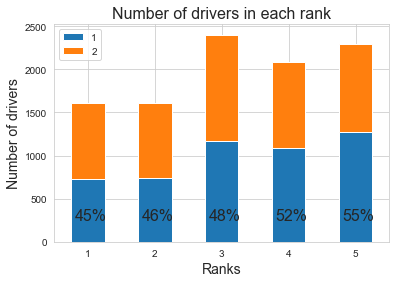

In [84]:
axis = num_drivers.plot(kind="bar", stacked=True)

fig = axis.get_figure()
for i in range(len(percentage)):
    axis.text(i-0.2, 250, str(int(percentage[i]))+'%', fontsize=16)
plt.xlabel('Ranks', size=14)
plt.ylabel('Number of drivers', size=14)
plt.title('Number of drivers in each rank', size=16)
axis.set_xticklabels(axis.get_xticks()+1, rotation = 0);

- Other companies tend to bid more on one driver than two drivers.

### Insurance status

In [79]:
pd.DataFrame(df.groupby(by=['rank'])['Currently Insured'].value_counts()).T

rank                    1                 2              3                 4  \
Currently Insured unknown    Y    N unknown    N    Y    N    Y unknown    N   
Currently Insured    1322  167  122     943  374  291  898  794     709  965   

rank                               5        
Currently Insured    Y unknown     Y     N  
Currently Insured  961     163  1206  1085

In [80]:
insurance_stat = pd.DataFrame([{'Insured':167, 'Not insured':122, 'Unknown':1322},
                    {'Insured':291, 'Not insured':374, 'Unknown':943},
                    {'Insured':794, 'Not insured':898, 'Unknown':709},
                    {'Insured':961, 'Not insured':965, 'Unknown':163},
                    {'Insured':1206, 'Not insured':1085, 'Unknown':0}])
y_n_ratio = insurance_stat['Insured']/insurance_stat['Not insured']
insurance_stat.index += 1

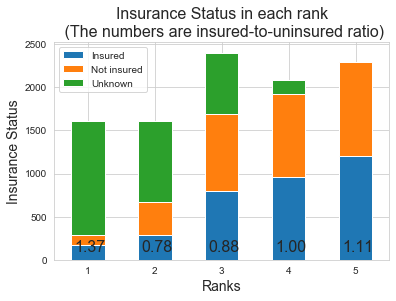

In [81]:
axis = insurance_stat.plot(kind="bar", stacked=True)

fig = axis.get_figure()
for i in range(len(percentage)):
    axis.text(i-0.2, 100, '%.2f'%y_n_ratio[i], fontsize=16)
plt.xlabel('Ranks', size=14)
plt.ylabel('Insurance Status', size=14)
plt.title('Insurance Status in each rank\n (The numbers are insured-to-uninsured ratio)', size=16)
axis.set_xticklabels(axis.get_xticks()+1, rotation = 0);

- Unknown insurance status discourages other companies to bid high.